In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import glob
from scipy.stats import binned_statistic, binned_statistic_2d

dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/results/'
infile = dir + 'MC_C_20191031_001500_R02_S02_20.0s_-293.2x_39.6y_gridfit.cat' #an example catalog

## Open the FITS object
hdulist = fits.open(infile)

prihdu = hdulist[0]
prihdr = prihdu.header
pathlist = glob.glob(dir+'MC*.cat')
print(repr(prihdr))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 


In [1]:
#create list of file paths to iterate over
# pathlist = glob.glob(dir+'MC*.cat')

# x_arr = np.zeros((49*49, len(pathlist)))
# y_arr = np.zeros((49*49, len(pathlist)))
# xx_arr = np.zeros((49*49, len(pathlist)))
# yy_arr = np.zeros((49*49, len(pathlist)))
# xy_arr = np.zeros((49*49, len(pathlist)))

# #creates data tables for each spot
# #fills in spot element with NaN if it does not exist
# #(some catalogs have <2401 spot entries)
# for cat_idx, path in enumerate(pathlist):
#     with fits.open(path) as hdul:
#         cat = Table(hdul[1].data)
#         bool_mask = cat['spotgrid_index'] >= 0.
#         mask_cat = cat[bool_mask]
#         mask_cat.add_index('spotgrid_index')
        
#         for spot in range(0, 2401):
#             j = float(spot) #spotgrid_index is a column of floats
#             try:
#                 row = mask_cat.loc[j]
#                 x_i = row['base_SdssCentroid_x']
#                 y_i = row['base_SdssCentroid_y']
#                 xx_i = row['base_SdssShape_xx']
#                 yy_i = row['base_SdssShape_yy']
#                 xy_i = row['base_SdssShape_xy']
#                 x_arr[spot, cat_idx] = x_i
#                 y_arr[spot, cat_idx] = y_i                
#                 xx_arr[spot, cat_idx] = xx_i
#                 yy_arr[spot, cat_idx] = yy_i
#                 xy_arr[spot, cat_idx] = xy_i ##
#             except KeyError: #need to catch when there are <2401 entries in a catalog
#                 x_arr[spot, cat_idx] = np.nan
#                 y_arr[spot, cat_idx] = np.nan                
#                 xx_arr[spot, cat_idx] = np.nan
#                 yy_arr[spot, cat_idx] = np.nan
#                 xy_arr[spot, cat_idx] = np.nan

# np.save('r02_s02_x_arr', x_arr)
# np.save('r02_s02_y_arr', y_arr)
# np.save('r02_s02_xx_arr', xx_arr)
# np.save('r02_s02_yy_arr', yy_arr)
# np.save('r02_s02_xy_arr', xy_arr)

In [2]:
x_arr = np.load('r02_s02_x_arr.npy')
y_arr = np.load('r02_s02_y_arr.npy')
xx_arr = np.load('r02_s02_xx_arr.npy')
yy_arr = np.load('r02_s02_yy_arr.npy')
xy_arr = np.load('r02_s02_xy_arr.npy')

In [3]:
#averages all exposures together of each spot
xx_mean = np.nanmean(xx_arr, axis=1)
xx_med = np.nanmedian(xx_arr, axis=1)
xx_std = np.nanstd(xx_arr, axis=1)

yy_mean = np.nanmean(yy_arr, axis=1)
yy_med = np.nanmedian(yy_arr, axis=1)
yy_std = np.nanstd(yy_arr, axis=1)

xy_mean = np.nanmean(xy_arr, axis=1)
xy_med = np.nanmedian(xy_arr, axis=1)
xy_std = np.nanstd(xy_arr, axis=1)

xxyy_err = np.sqrt(xx_std**2 + yy_std**2)

#create a masked catalog with only the projector spots (no stray sources) for plotting uses
with fits.open(pathlist[1]) as hdul: #pathlist[1] is the first catalog in this batch with all 2401 spots detected
    cat = Table(hdul[1].data)
    bool_mask = cat['spotgrid_index'] >= 0.
    mask_cat = cat[bool_mask]
    mask_cat.sort(['spotgrid_index'])
    
#x and y can be used to plot spots
x = mask_cat['spotgrid_x']
y = mask_cat['spotgrid_y']

# np.save('r02_s02_x', x)
# np.save('r02_s02_y', y)

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2020_24/conda/miniconda3-4.7.12/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Text(0.5, 0, '[$\\mathrm{pixels}^2$]')

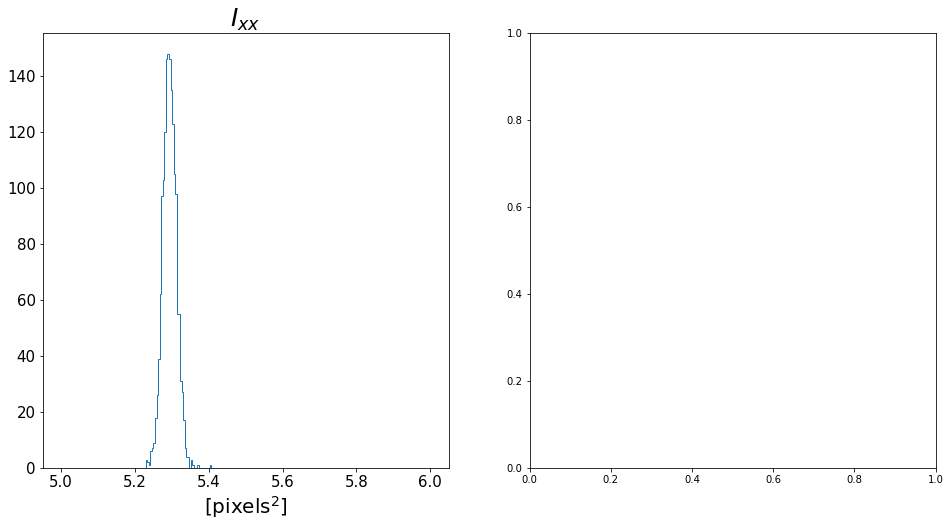

In [48]:
num = 1
loc = 1245
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for row in xx_arr[loc:loc+num,:]:
    axes[0].hist(row, bins='auto', histtype='step', range=(5,6))
    
for row in yy_arr[loc:loc+num,:]:
    axes[1].hist(row, bins='auto', histtype='step', range=(5,6))

axes[0].set_title(r'$I_{xx}$', fontsize=25)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_xlabel(r'[$\mathrm{pixels}^2$]', fontsize=20)

axes[1].set_title(r'$I_{yy}$', fontsize=25)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_xlabel(r'[$\mathrm{pixels}^2$]', fontsize=20)

(array([  1.,   1.,   1.,   2.,   3.,   8.,   5.,  13.,  20.,  48.,  44.,
         83., 114., 118., 146., 128., 145., 156., 118., 105.,  97.,  77.,
         60.,  37.,  23.,  19.,  14.,   5.,   4.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([5.03695855, 5.04638786, 5.05581718, 5.06524649, 5.0746758 ,
        5.08410511, 5.09353443, 5.10296374, 5.11239305, 5.12182237,
        5.13125168, 5.14068099, 5.1501103 , 5.15953962, 5.16896893,
        5.17839824, 5.18782755, 5.19725687, 5.20668618, 5.21611549,
        5.2255448 , 5.23497412, 5.24440343, 5.25383274, 5.26326205,
        5.27269137, 5.28212068, 5.29154999, 5.3009793 , 5.31040862,
        5.31983793, 5.32926724, 5.33869655, 5.34812587, 5.35755518,
        5.36698449, 5.3764138 , 5.38584312, 5.39527243, 5.40470174,
        5.41413105]),
 <a list of 1 Patch objects>)

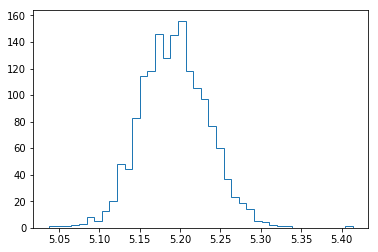

In [66]:
loc = 1227
onerow =xx_arr[loc:loc+num,:][0]
plt.hist(onerow, bins='auto', histtype='step')

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   3.,   2.,   6.,
          7.,  13.,  19.,  16.,  47.,  48.,  74.,  87., 103., 133., 125.,
        149., 145., 151., 102., 100.,  59.,  64.,  42.,  28.,  24.,  19.,
         13.,   4.,   2.,   4.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.08929256, 0.09150342, 0.09371427, 0.09592513, 0.09813598,
        0.10034683, 0.10255769, 0.10476854, 0.1069794 , 0.10919025,
        0.11140111, 0.11361196, 0.11582282, 0.11803367, 0.12024453,
        0.12245538, 0.12466624, 0.12687709, 0.12908795, 0.1312988 ,
        0.13350966, 0.13572051, 0.13793136, 0.14014222, 0.14235307,
        0.14456393, 0.14677478, 0.14898564, 0.15119649, 0.15340735,
        0.1556182 , 0.15782906, 0.16003991, 0.16225077, 0.16446162,
        0.16667248, 0.16888333, 0.17109419, 0.17330504, 0.1755159 ,
        0.17772675, 0.1799376 , 0.18214846, 0.18435931, 0.18657017,
  

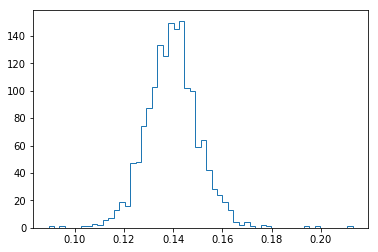

In [59]:
onerow =xy_arr[loc:loc+num,:][0]
plt.hist(onerow, bins='auto', histtype='step')

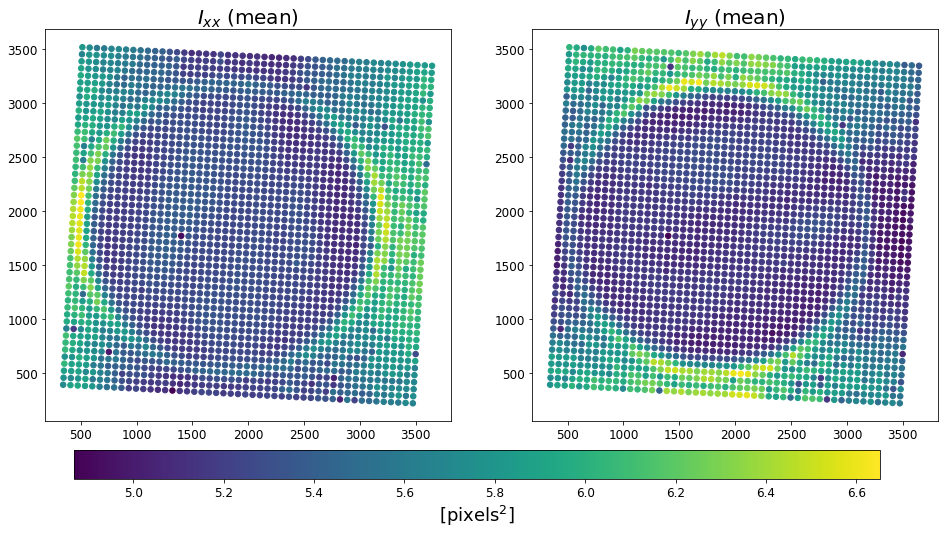

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
im0 = axes[0].scatter(x, y, c = xx_mean, s = 30, marker='o')
im1 = axes[1].scatter(x, y, c = yy_mean, s = 30, marker='o')

axes[0].set_title(r'$I_{xx}$ (mean)', fontsize=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].set_title(r'$I_{yy}$ (mean)', fontsize=20)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05])
cbar = fig.colorbar(im0, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'[$\mathrm{pixels}^2$]', fontsize=18)
cbar.ax.tick_params(labelsize=12)

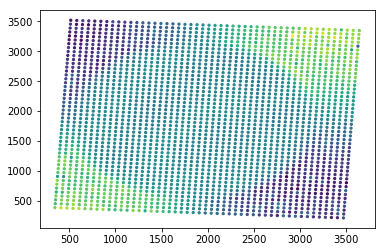

In [103]:
with fits.open(pathlist[1]) as hdul: #pathlist[1] is the first catalog in this batch with all 2401 spots detected
    cat = Table(hdul[1].data)
    bool_mask = cat['spotgrid_index'] >= 0.
    mask_cat = cat[bool_mask]
    mask_cat.sort(['spotgrid_index'])
    
#x and y can be used to plot spots
xw = cat['spotgrid_x']
yw = cat['spotgrid_y']
cw = cat['base_SdssShape_xy']
plt.scatter(xw, yw, s = 20, marker='.',c = cw)

array([False,  True,  True, ...,  True,  True, False])

(2401,)